# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [ ]:
import math
N = 10000   # total number of rounds (users)
d = 10      # number of ads
adsSelected = []
numbersOfSelections = [0] * d
sumsOfRewards = [0] * d
totalRewards = 0

for n in range(0, N):
  ad = 0
  maxUpperBound = 0
  for i in range(0,d):
    if (numbersOfSelections[i] > 0):
      avgReward = sumsOfRewards[i] / numbersOfSelections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbersOfSelections[i])
      upperBound = avgReward + delta_i
    else:
      upperBound = 1e400  # ensure it gets selected since it hasn't already
    if (upperBound > maxUpperBound):
      maxUpperBound = upperBound
      ad = i
  adsSelected.append(ad)
  numbersOfSelections[ad] += 1
  reward = dataset.values[n, ad]
  sumsOfRewards[ad] += reward
  totalRewards += reward

For every user:
  Default to Ad0, maxObservedUpperBound to 0
  Show each ad to this user doing:
    If this ad hasn't ever been shown before (this is the first user):
      ENSURE this ad gets selected ("played") by setting a hella high confidence
    If this ad has been played (this is not the first user):
      Find average reward of this ad (sum of its reward/#times it has been played)
      Find the delta: sqrt(3/2 log(round or user#) / #times ad's been played)
      Find upper bound by doing avg reward + delta
      If this ad gave an upper bound exceeding the past record for this user, record this new maxObservedUpperBound, and call this good ad 'ad' because it slayed for this user/round
    Now back to this user. Put 'ad' in a list (this will be N ads that were slay for each N users). Count how many times each ad slayed in a d-long list numbersOfSelection. Give the ad +1 reward if this user followed through with it. Sum this to total_rewards also.

## Visualising the results

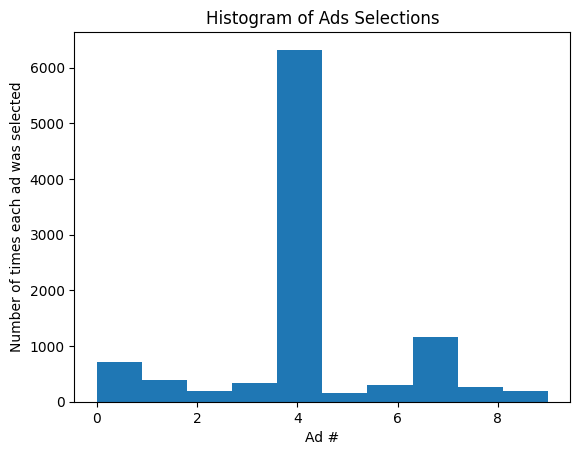

In [ ]:
plt.hist(adsSelected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ad #')
plt.ylabel('Number of times each ad was selected')
plt.show()